In [1]:
# 1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression


import pickle
import os
import re

In [3]:
# 2
idx = [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8)]
#idx = [(1, 0)]
for z, c in idx:
    data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    dis_s = {}
    symptoms = {}
    for xy in data:
        disease = xy['disease_tag']
        dis_s.setdefault(disease, {'index':len(dis_s), 'symptom':dict()})
        temp2 = xy['goal']['implicit_inform_slots']
        temp2.update(xy['goal']['explicit_inform_slots'])
        for x, y in temp2.items():
            symptoms.setdefault(x, len(symptoms))
            dis_s[disease]['symptom'].setdefault(x, 0)
            dis_s[disease]['symptom'][x] += 1
    #for x in dis_s:
        #frequency = 0
        #for y in dis_s[x]['symptom']:
            #frequency += dis_s[x]['symptom'][y]
        #for y in dis_s[x]['symptom']:
            #dis_s[x]['symptom'][y] /= frequency
    symptoms['Total Symptom'] = len(symptoms)
    pickle.dump(obj = dis_s, file = open(r'label' + str(z) + '\out1.p', 'wb'), protocol = 2)
    pickle.dump(obj = symptoms, file = open(r'label' + str(z) + '\out2.p', 'wb'), protocol = 2)

In [5]:
# 3
#idx = [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8)]
idx = [(1, 0)]
for z, c in idx:
    print(z)
    temp_dict = pickle.load(open(r'out2.p', 'rb'))
    temp_data = pickle.load(open(r'out1.p', 'rb'))
    length = 0

    dict = {}
    dict1 = {}
    dict2 = {}
    dict3 = {}

    for xy in temp_dict:
        dict[length] = xy
        dict1[xy] = length
        length += 1

    length = 0
    for xy in temp_data:
        dict2[length] = xy
        dict3[xy] = length
        length += 1

    data_set = pickle.load(open(r'goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    count1 = 0
    
    for xy in data:
        count1 += 1

    X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
    y = np.zeros(shape=(1, count1), dtype=np.uint8)
    y = y.flatten()
    count1 = 0
    
    
    for xy in data:
        for xx in xy['goal']['explicit_inform_slots']:
            X[count1][dict1[xx]] = 1
        for xx in xy['goal']['implicit_inform_slots']:
            X[count1][dict1[xx]] = 1
        y[count1] = dict3[xy['disease_tag']]
        count1 += 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    #a = model.feature_importances_
    tot = int(temp_dict["Total Symptom"])
    tot = int((70*tot + 99)/100)
    bestfeatures = SelectKBest(score_func=chi2, k = tot)
    #bestfeatures = ExtraTreesClassifier(n_estimators = tot)
    
    #mi
    
    #f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
    #f_selector.fit(X_train, y_train)
    from sklearn.preprocessing import MinMaxScaler
    #chi2
    fit = bestfeatures.fit(X_train, y_train)
    
    X = bestfeatures.transform(X)
    #dfscores = f_selector.scores_
    dfscores = fit.scores_
    amin, amax = min(dfscores), max(dfscores)
    #print(dfscores)
    #for i, val in enumerate(dfscores):
        #dfscores[i] = (val-amin) / (amax-amin)
    #print(dfscores)
    l = []
    timer = 0
    print("debug")
    for i in dfscores:
        l.append((i, dict[timer]))
        timer += 1
    l.sort()
    #print(timer)
    res = {}
    for i, j in l:
        res[j] = float(i)
    #pickle.dump(obj = res, file = open(r'out3.p', 'wb'), protocol = 2)
    #l.reverse()
    print(l)
    r = []
    res = {}
    for i in range (0, tot):
        r.append(l[i])
    res = {}
    timer = 0
    for i, j in r:
        res[j] = float(i)
        timer += 1
    print(res)
    print(timer)
    pickle.dump(obj = res, file = open(r'no_name.p', 'wb'), protocol = 2)
    #Arm weakness Cross-eyed Elbow weakness

1
debug
[(92.02325581395353, 'Incontinence of stool'), (178.45112781954896, 'Pus in urine'), (206.69565217391306, 'Back stiffness or tightness'), (221.64902823095466, 'Back weakness'), (268.6981132075471, 'Pus in sputum'), (325.8969072164949, 'Hand or finger cramps or spasms'), (358.2641509433964, 'Abnormal size or shape of ear'), (435.8592107684532, 'Muscle swelling'), (436.17647058823525, 'Irregular belly button'), (442.76119402985074, 'Nose deformity'), (484.00224935590626, 'Nightmares'), (495.0, 'Feeling cold'), (511.5189021132288, 'Low back weakness'), (523.4117647058824, 'Scanty menstrual flow'), (529.3159851301115, 'Back mass or lump'), (572.313253012048, 'Itching of scrotum'), (608.3846153846152, 'Frequent menstruation'), (636.67816091954, 'Hysterical behavior'), (644.1627906976743, 'Disturbance of smell or taste'), (660.9895470383279, 'Bowlegged or knock-kneed'), (697.7794209268264, 'Feeling hot and cold'), (763.0843373493979, 'Bladder mass'), (796.9701492537314, 'Too little h

## Disease Classifier

In [2]:
# classifier
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
avg = 0
d = 0
nd = 0

for z in idx:
    temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))
    dis = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    
    data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    #temp_dict.pop('Total Symptom')

    dict_sym_i ={}
    dict_i_sym = {}
    total_sym = 0
    for xy in temp_dict:
        dict_sym_i[xy] = total_sym
        dict_i_sym[total_sym] = xy
        total_sym += 1
        
    #pickle.dump(obj = dict_sym_i, file = open('dict_sym_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_sym, file = open('dict_i_sym.p', 'wb'), protocol = 2)
    
    dict_dis_i = {}
    dict_i_dis = {}
    total_dis = 0
    for xy in temp_data:
        dict_dis_i[xy] = total_dis
        dict_i_dis[total_dis] = xy
        total_dis +=1
    #pickle.dump(obj = dict_dis_i, file = open('dict_dis_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_dis, file = open('dict_i_dis.p', 'wb'), protocol = 2)
    
    total_dia = 0
    for xy in data:
        total_dia += 1
    
    print(z)
    print(dis['Total Symptom'])
    print(total_sym)
    X = np.zeros(shape=(total_dia, total_sym), dtype=np.uint8)
    y = np.zeros(shape=(1, total_dia), dtype=np.uint8)
    y = y.flatten()
    total_dia = 0
    
    for xy in data:
        for xx in xy['goal']['explicit_inform_slots']:
            if xx in dict_sym_i:
                X[total_dia][dict_sym_i[xx]] = 1
        for xx in xy['goal']['implicit_inform_slots']:
            if xx in dict_sym_i:
                X[total_dia][dict_sym_i[xx]] = 1
        y[total_dia] = dict_dis_i[xy['disease_tag']]
        total_dia += 1
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    avg += accuracy_score(y_test, y_pred)
    d += dis['Total Symptom']
    nd += total_sym
    #pickle.dump(classifier, open(r'label' + str(z) + '\or.sav', 'wb'))

print(" ")
print(avg/9)
print(d)
print(nd)

1
65
66
0.855
2
89
90
0.985
3
68
69
0.863
4
58
59
0.927
5
46
47
0.784
6
51
52
0.797
7
62
63
0.952
8
69
70
0.958
9
73
74
0.874
 
0.8883333333333332
581
590


In [1]:
# 1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression


import pickle
import os
import re

In [2]:
# classifier new

idx = [1,2,3,4,5,6,7,8,9,10]
avg = 0
d = 0
nd = 0

for z in idx:
    temp_dict = pickle.load(open(r'out2.p', 'rb'))
    temp_data = pickle.load(open(r'out1.p', 'rb'))
    
    association = pickle.load(open(r'SD++.p', 'rb'))
    a_i_s = pickle.load(open(r'IDS.p', 'rb'))
    a_s_i = pickle.load(open(r'SID.p', 'rb'))
    
    #dis = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    
    data_set = pickle.load(open(r'goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    #temp_dict.pop('Total Symptom')

    dict_sym_i ={}
    dict_i_sym = {}
    total_sym = 0
    
    print(z)
    #print(dis['Total Symptom'])
    del temp_dict['Total Symptom']
    
    for xy in temp_dict:
        dict_sym_i[xy] = total_sym
        dict_i_sym[total_sym] = xy
        total_sym += 1
        
    #print(total_sym)   
    #pickle.dump(obj = dict_sym_i, file = open('dict_sym_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_sym, file = open('dict_i_sym.p', 'wb'), protocol = 2)
    
    dict_dis_i = {}
    dict_i_dis = {}
    total_dis = 0
    for xy in temp_data:
        dict_dis_i[xy] = total_dis
        dict_i_dis[total_dis] = xy
        total_dis +=1
    #pickle.dump(obj = dict_dis_i, file = open('dict_dis_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_dis, file = open('dict_i_dis.p', 'wb'), protocol = 2)
    
    total_dia = 0
    for xy in data:
        total_dia += 1
    
    
    X = np.zeros(shape=(total_dia, total_sym), dtype=np.uint8)
    y = np.zeros(shape=(1, total_dia), dtype=np.uint8)
    y = y.flatten()
    total_dia = 0
    
    for xy in data:
        explicit_count = 0
        already = {}
        tl = {}
        for xx in xy['goal']['explicit_inform_slots']:
            X[total_dia][dict_sym_i[xx]] = 1
            explicit_count += 1
            already[xx] = 0
            l = []
            for x in association[a_s_i[xx]]:
                if x in a_i_s:
                    l.append((association[a_s_i[xx]][x],a_i_s[x]))

            for work in range (0, z):
                for wx, wy in l:
                    if wy in tl:
                        tl[wy] = tl[wy] + wx 
                    else:
                        tl[wy] = wx
                        
                l.clear()
                for aa in tl:
                    l.append((tl[aa], aa))
                l.sort()
                l.reverse()
                #print(l)
                for wx, wy in l:
                    if wy not in already:
                        already[wy] = 0
                        break
                l.clear()
                for x in association[a_s_i[wy]]:
                    if x in a_i_s:
                        l.append((association[a_s_i[wy]][x],a_i_s[x]))
        
        for xx in xy['goal']['implicit_inform_slots']:
            if xx in already:
                X[total_dia][dict_sym_i[xx]] = 1
            #currently not considering !!!
            temp = 0
            
        assert explicit_count == 1
        
        y[total_dia] = dict_dis_i[xy['disease_tag']]
        total_dia += 1
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    avg += accuracy_score(y_test, y_pred)
    #d += dis['Total Symptom']
    #nd += total_sym
    #pickle.dump(classifier, open(r'label' + str(z) + '\or.sav', 'wb'))

print(" ")
#print(avg/9)
#print(d)
#print(nd)

1
0.391
2
0.4335
3
0.4643333333333333
4
0.4846666666666667
5
0.506
6
0.5251666666666667
7
0.5525
8
0.5663333333333334
9
0.5776666666666667
10
0.5868333333333333
 


In [9]:
tempp = [(3,4),(2,1),(0,-1),(0,-3)]
tempp.sort()
tempp.reverse()
print(tempp)

[(3, 4), (2, 1), (0, -1), (0, -3)]


In [16]:
#testing
association = pickle.load(open(r'SD++.p', 'rb'))
a_i_s = pickle.load(open(r'IDS.p', 'rb'))
a_s_i = pickle.load(open(r'SID.p', 'rb'))

#print(association['S_237'])
l = []
for x in association['S_237']:
    if x in a_i_s:
        l.append((association['S_237'][x],a_i_s[x]))
l.sort
l.reverse
print(l[0][1])
print(a_i_s)

Skin rash
{'S_237': 'Abnormal appearing skin', 'S_141': 'Abnormal involuntary movements', 'S_180': 'Abnormal movement of eyelid', 'S_242': 'Abnormal size or shape of ear', 'S_99': 'Absence of menstruation', 'S_41': 'Abusing alcohol', 'S_88': 'Ache all over', 'S_29': 'Acne or pimples', 'S_169': 'Allergic reaction', 'S_131': 'Ankle pain', 'S_87': 'Ankle stiffness or tightness', 'S_76': 'Ankle swelling', 'S_10': 'Anxiety and nervousness', 'S_53': 'Apnea', 'S_199': 'Arm lump or mass', 'S_77': 'Arm pain', 'S_250': 'Arm stiffness or tightness', 'S_245': 'Arm swelling', 'S_3': 'Arm weakness', 'S_35': 'Back cramps or spasms', 'S_189': 'Back mass or lump', 'S_73': 'Back pain', 'S_142': 'Back stiffness or tightness', 'S_94': 'Back weakness', 'S_123': 'Bladder mass', 'S_235': 'Bleeding from eye', 'S_216': 'Bleeding gums', 'S_46': 'Bleeding or discharge from nipple', 'S_262': 'Blindness', 'S_254': 'Blood in urine', 'S_158': 'Bones are painful', 'S_257': 'Bowlegged or knock-kneed', 'S_232': 'Burnin

In [25]:
#new testing batch 2
# classifier new
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
avg = 0
d = 0
nd = 0

for z in idx:
    temp_dict = pickle.load(open(r'out2.p', 'rb'))
    temp_data = pickle.load(open(r'out1.p', 'rb'))
    
    association = pickle.load(open(r'SD++.p', 'rb'))
    a_i_s = pickle.load(open(r'IDS.p', 'rb'))
    a_s_i = pickle.load(open(r'SID.p', 'rb'))
    
    #dis = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    
    data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    #temp_dict.pop('Total Symptom')

    dict_sym_i ={}
    dict_i_sym = {}
    total_sym = 0
    
    print(z)
    #print(dis['Total Symptom'])
    del temp_dict['Total Symptom']
    
    for xy in temp_dict:
        dict_sym_i[xy] = total_sym
        dict_i_sym[total_sym] = xy
        total_sym += 1
        
    #print(total_sym)   
    #pickle.dump(obj = dict_sym_i, file = open('dict_sym_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_sym, file = open('dict_i_sym.p', 'wb'), protocol = 2)
    
    dict_dis_i = {}
    dict_i_dis = {}
    total_dis = 0
    for xy in temp_data:
        dict_dis_i[xy] = total_dis
        dict_i_dis[total_dis] = xy
        total_dis +=1
    #pickle.dump(obj = dict_dis_i, file = open('dict_dis_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_dis, file = open('dict_i_dis.p', 'wb'), protocol = 2)
    
    total_dia = 0
    for xy in data:
        total_dia += 1
    
    
    X = np.zeros(shape=(total_dia, total_sym), dtype=np.uint8)
    y = np.zeros(shape=(1, total_dia), dtype=np.uint8)
    y = y.flatten()
    total_dia = 0
    
    for xy in data:
        explicit_count = 0
        
        for xx in xy['goal']['explicit_inform_slots']:
            X[total_dia][dict_sym_i[xx]] = 1
            explicit_count += 1
            continue
            l = []
            for x in association[a_s_i[xx]]:
                if x in a_i_s:
                    l.append((association['S_237'][x],a_i_s[x]))
                    l.sort
                    l.reverse
            X[total_dia][dict_sym_i[l[0][1]]] = 1
            X[total_dia][dict_sym_i[l[1][1]]] = 1
            X[total_dia][dict_sym_i[l[2][1]]] = 1
        
        for xx in xy['goal']['implicit_inform_slots']:
            X[total_dia][dict_sym_i[xx]] = 1
            #currently not considering !!!
            #temp = 0
            
        assert explicit_count == 1
        
        y[total_dia] = dict_dis_i[xy['disease_tag']]
        total_dia += 1
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    avg += accuracy_score(y_test, y_pred)
    d += dis['Total Symptom']
    nd += total_sym
    #pickle.dump(classifier, open(r'label' + str(z) + '\or.sav', 'wb'))

print(" ")
print(avg/9)
print(d)
print(nd)

1
0.855
2
0.985
3
0.862
4
0.929
5
0.78
6
0.799
7
0.952
8
0.959
9
0.874
 
0.8883333333333333
657
2394


In [ ]:
100 - 0.8883333333333332
90  - 0.888
80  - 0.8832222222222222 (0.005)
70  - 0.8774444444444444 (0.006)

In [44]:
# useless things onwards
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for z in idx:
    print(z)
    temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))

    dict = {}
    dict1 = {}
    
    length = 0
    for xy in temp_dict:
        dict[length] = xy
        dict1[xy] = length
        length += 1

    X = np.zeros(shape=(1, temp_dict["Total Symptom"]), dtype=np.uint8)
        
    for xy in temp_data:
        for xx in temp_data[xy]['symptom']:
            X[0][dict1[xx]] += 1
    #print(X)
    
    res = {}
    timer = 0
    for i in range (0, temp_dict["Total Symptom"]):
        if X[0][i] == 1:
            res[dict[i]] = timer
            timer += 1
            
    print(res)
    pickle.dump(obj = res, file = open(r'label' + str(z) + '\label_unique.p', 'wb'), protocol = 2)   

1
{'Loss of sensation': 0, 'Neck swelling': 1, 'Nausea': 2, 'Lower abdominal pain': 3, 'Swelling of scrotum': 4, 'Pelvic pain': 5, 'Vomiting': 6, 'Sore throat': 7, 'Arm swelling': 8, 'Arm lump or mass': 9, 'Swollen eye': 10, 'Abnormal appearing skin': 11, 'Spotting or bleeding during pregnancy': 12, 'Feeling hot and cold': 13, 'Sharp chest pain': 14, 'Loss of sex drive': 15, 'Headache': 16, 'Groin mass': 17, 'Itchy eyelid': 18, 'Eye redness': 19, 'Frequent urination': 20, 'Cough': 21, 'Shoulder swelling': 22, 'Pain in testicles': 23, 'Penis redness': 24, 'Paresthesia': 25, 'Vulvar sore': 26, 'Problems during pregnancy': 27, 'Cramps and spasms': 28, 'Neck cramps or spasms': 29, 'Irritable infant': 30, 'Ache all over': 31, 'Emotional symptoms': 32, 'Problems with movement': 33, 'Penis pain': 34, 'Elbow weakness': 35, 'Cross-eyed': 36, 'Nailbiting': 37, 'Bowlegged or knock-kneed': 38}
2
{'Congestion in chest': 0, 'Fever': 1, 'Symptoms of the kidneys': 2, 'Difficulty in swallowing': 3, 'Th

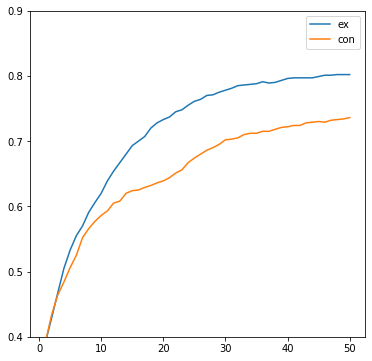

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
y1 = [0.391
,0.428
,0.467
,0.505
,0.533
,0.555
,0.570
,0.591
,0.606
,0.620
,0.639
,0.654
,0.667
,0.680
,0.693
,0.700
,0.707
,0.720
,0.728
,0.733
,0.737
,0.745
,0.748
,0.755
,0.761
,0.764
,0.770
,0.771
,0.775
,0.778
,0.781
,0.785
,0.786
,0.787
,0.788
,0.791
,0.789
,0.790
,0.793
,0.796
,0.797
,0.797
,0.797
,0.797
,0.799
,0.801
,0.801
,0.802
,0.802
,0.802
]
plt.plot(x, y1, label = 'ex')
y2 = [0.391
,0.433
,0.464
,0.484
,0.506
,0.525
,0.552
,0.566
,0.577
,0.586
,0.593
,0.605
,0.608
,0.620
,0.624
,0.625
,0.629
,0.632
,0.636
,0.639
,0.644
,0.651
,0.656
,0.667
,0.674
,0.680
,0.686
,0.690
,0.695
,0.702
,0.703
,0.705
,0.710
,0.712
,0.712
,0.715
,0.715
,0.718
,0.721
,0.722
,0.724
,0.724
,0.728
,0.729
,0.730
,0.729
,0.732
,0.733
,0.734
,0.736
]
plt.plot(x, y2, label = 'con')
plt.ylim(0.4, 0.9)
plt.legend()

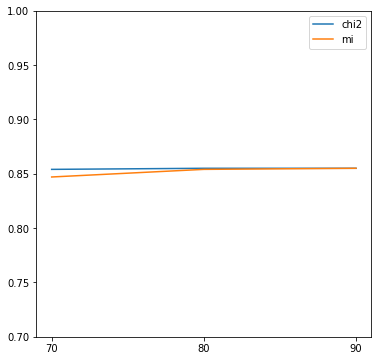

In [73]:
#1
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.847, 0.854, 0.855]
plt.plot(x, y1, label = 'chi2')
y2 = [0.842, 0.849, 0.854]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

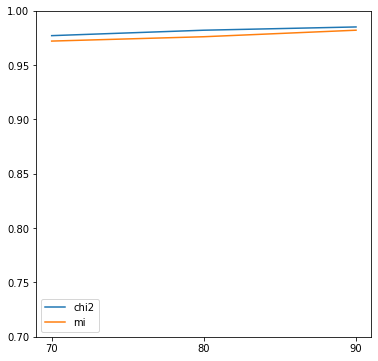

In [74]:
#2
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.977, 0.982, 0.985]
plt.plot(x, y1, label = 'chi2')
y2 = [0.972, 0.976, 0.982]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

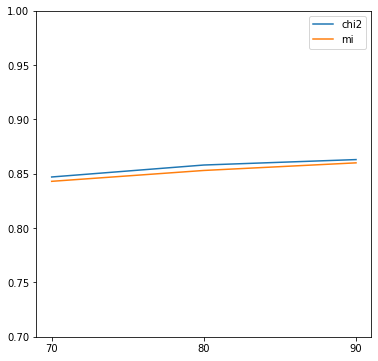

In [75]:
#3
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.847, 0.858, 0.863]
plt.plot(x, y1, label = 'chi2')
y2 = [0.843, 0.853, 0.86]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

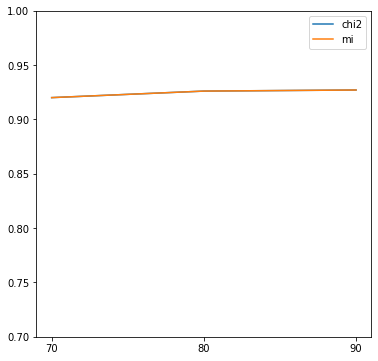

In [76]:
#4
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.92, 0.926, 0.927]
plt.plot(x, y1, label = 'chi2')
y2 = [0.92, 0.926, 0.927]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

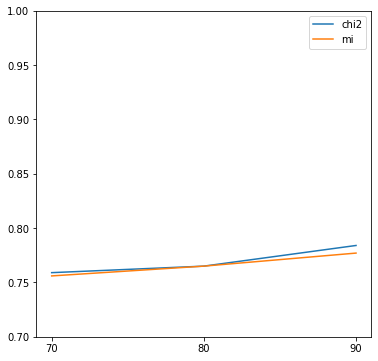

In [77]:
#5
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.759, 0.765, 0.784]
plt.plot(x, y1, label = 'chi2')
y2 = [0.756, 0.765, 0.777]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

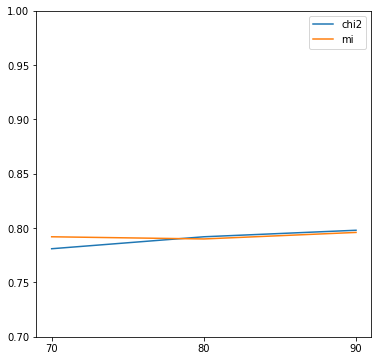

In [78]:
#6
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.781, 0.792, 0.798]
plt.plot(x, y1, label = 'chi2')
y2 = [0.792, 0.79, 0.796]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

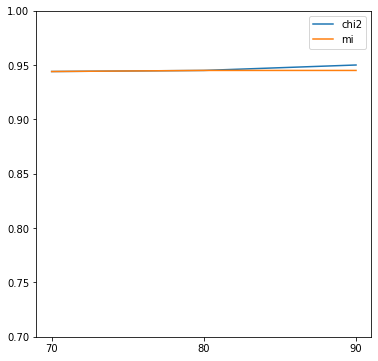

In [79]:
#7
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.944, 0.945, 0.95]
plt.plot(x, y1, label = 'chi2')
y2 = [0.944, 0.945, 0.945]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

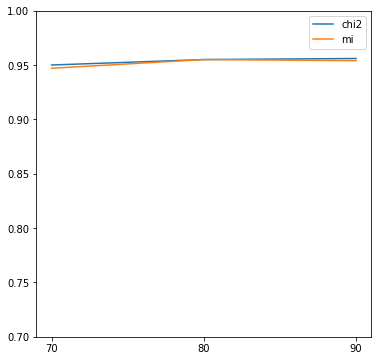

In [80]:
#8
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.95, 0.955, 0.956]
plt.plot(x, y1, label = 'chi2')
y2 = [0.947, 0.955, 0.954]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

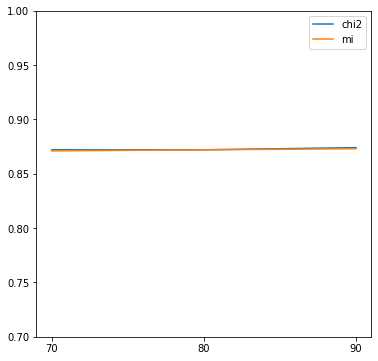

In [81]:
#9
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.872, 0.872, 0.874]
plt.plot(x, y1, label = 'chi2')
y2 = [0.871, 0.872, 0.873]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()